# Objective:
>Predict Canadas per capita income for the year 2020 using linear regression

## 1.Import Necessary Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## 2.Import Data

In [6]:
income_data=pd.read_csv('canada_per_capita_income.csv')
income_data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


## 3.Data Understanding/EDA

In [7]:
income_data.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [8]:
income_data.dtypes

year                         int64
per capita income (US$)    float64
dtype: object

In [9]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [10]:
income_data.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


## 3.1 Renaming the columns

In [23]:
income_data.rename({'year':'Year','per capita income (US$)':'PCI'},axis=1,inplace=True)

In [25]:
income_data.head()

,Year,PCI
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


## 3.2 Visualizing the data

Text(0.5, 1.0, 'SLR on PCI')

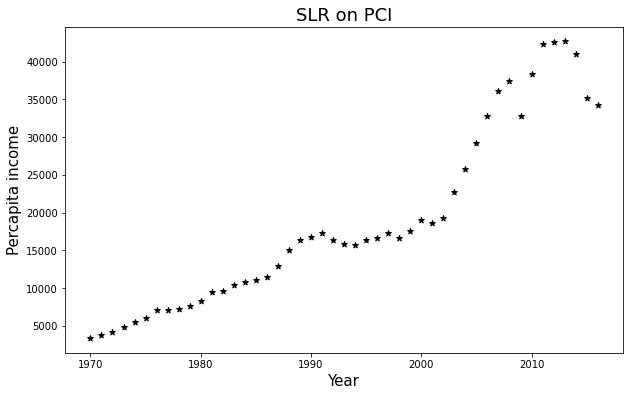

In [37]:
plt.figure(figsize=(10,6))
plt.scatter('Year','PCI',data=income_data,marker='*',color='black')
plt.xlabel('Year',size=15)
plt.ylabel('Percapita income',size=15)
plt.title('SLR on PCI',size=18)

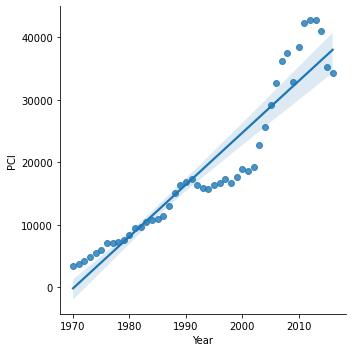

In [38]:
sns.lmplot('Year','PCI',data=income_data)

## 4.Model Building

### 4.1 Model Building using sklearn linear regression

In [40]:
x=pd.DataFrame(income_data['Year'])
y=pd.DataFrame(income_data['PCI'])

In [41]:
x.shape , y.shape

((47, 1), (47, 1))

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#### Shapes after splitting the data

In [48]:
x_train.shape , y_train.shape

((37, 1), (37, 1))

In [49]:
x_test.shape , y_test.shape

((10, 1), (10, 1))

In [51]:
# train the models using training datasets
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [54]:
#predict on test data
y_pred_train=model1.predict(x_train)
y_pred_test=model1.predict(x_test)

In [57]:
print('coefficient(m):',model1.coef_)
print('intercept(c):',model1.intercept_)

coefficient(m): [[838.48247458]]
intercept(c): [-1651800.09653834]


### 4.1.1 Manual prediction

In [58]:
#y=mx+c
y=838.48247458*x+(-1651800.09653834)

In [59]:
y1=838.48247458*1971+(-1651800.09653834)
y2=838.48247458*1980+(-1651800.09653834)
y3=838.48247458*2000+(-1651800.09653834)
y4=838.48247458*2011+(-1651800.09653834)

In [60]:
print('CPI in 1971:',y1)
print('CPI in 1980:',y2)
print('CPI in 2000:',y3)
print('CPI in 2011:',y4)

CPI in 1971: 848.8608588401694
CPI in 1980: 8395.203130060108
CPI in 2000: 25164.852621660102
CPI in 2011: 34388.15984204016


### 4.1.2 Model prediction

In [67]:
#creating dataframe
data1=pd.DataFrame(data={'year':[1971,1980,2000,2011]})
data1

,year
0,1971
1,1980
2,2000
3,2011


In [68]:
#predicting the data
model1.predict(data1)

array([[  848.8608523 ],
       [ 8395.20312349],
       [25164.85261502],
       [34388.15983536]])

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
r2_score = regressor.score(x_test,y_test)
print(r2_score*100,'%')

76.22063756926367 %


### Inference:
  >This model is giving r2 square : **76.22063756926367**

## 4.2 Model Building using stats model

In [71]:
import statsmodels.formula.api as smf

In [82]:
model2= smf.ols(formula='PCI~Year',data=income_data).fit()

In [83]:
model2.params

Intercept   -1.632211e+06
Year         8.284651e+02
dtype: float64

### 4.2.1 Manual Prediction

In [84]:
#y=mx+c
y=828.4651*x+-1632211

In [85]:
Y1=828.4651*1971+(-1632211)
Y2=828.4651*1980+(-1632211)
Y3=828.4651*2000+(-1632211)
Y4=828.4651*2011+(-1632211)

In [86]:
print('CPI in 1971:',Y1)
print('CPI in 1980:',Y2)
print('CPI in 2000:',Y3)
print('CPI in 2011:',Y4)

CPI in 1971: 693.7121000001207
CPI in 1980: 8149.898000000045
CPI in 2000: 24719.199999999953
CPI in 2011: 33832.31609999994


### 4.2.2 Model Prediction

In [93]:
#Creating dataframe
data2=pd.DataFrame({'Year':[1971,1980,2000,2011]})
data2

,Year
0,1971
1,1980
2,2000
3,2011


In [95]:
#predicting the data
model2.predict(data2)

0      693.905409
1     8150.091086
2    24719.392590
3    33832.508417
dtype: float64

In [98]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PCI   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     367.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           2.80e-23
Time:                        19:47:33   Log-Likelihood:                -455.71
No. Observations:                  47   AIC:                             915.4
Df Residuals:                      45   BIC:                             919.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.632e+06   8.61e+04    -18.951      0.000   -1.81e+06   -1.46e+06
Year         828.4651     43.214     19.171      0.000     741.427     915.503
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.647
Skew:                           0.130   Prob(JB):                        0.724
Kurtosis:                       2.487   Cond. No.                     2.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Inference:
   >Model2 is giving good r2 value : **89%** when compared to Model1

### So Considering Model2 as a final model

#### predicting new data

In [99]:
new_test_data=pd.DataFrame(data={'Year':[2017,2018,2019,2020,2021,2022,2023,2024,2025]})
new_test_data

,Year
0,2017
1,2018
2,2019
3,2020
4,2021
5,2022
6,2023
7,2024
8,2025


In [110]:
pd.DataFrame(model2.predict(new_test_data))

,0
0,38803.298869
1,39631.763944
2,40460.229019
3,41288.694094
4,42117.159170
5,42945.624245
6,43774.089320
7,44602.554395
8,45431.019471


In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

In [113]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R^2 Score :          ", r2_score(y_test, y_pred_test))

Mean Absolute Error: 3734.394683220244
Mean Squared Error: 22894407.002098337
Root Mean Squared Error: 4784.810027796123
R^2 Score :           0.7622063756926367


## Conclusion:
   **Canadas per capita income** for the year 2020 is **41288**

# THE END!